# Part I - Prosper's Loan Data 
## by Idris Lawal

## Introduction
> This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), loan status, borrower income, and many others.


## Preliminary Wrangling


In [132]:
# import all packages and set plots to be embedded inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [133]:
loan = pd.read_csv('prosperLoanData.csv')

In [134]:
# checking the shape of the data
loan.shape

(113937, 81)

In [135]:
# Checking first five rows

loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [136]:
loan['ListingCreationDate'] = loan['ListingCreationDate'].astype('datetime64[ns]') # assigning appropriate data type to the 'ListingCreationDate' column.
loan = loan.set_index('ListingCreationDate').sort_index() #sort the dataframe from old to recent based on creation date.

In [137]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113937 entries, 2005-11-09 20:44:28.847000 to 2014-03-10 12:20:53.760000
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   CreditGrade                          28953 non-null   object 
 3   Term                                 113937 non-null  int64  
 4   LoanStatus                           113937 non-null  object 
 5   ClosedDate                           55089 non-null   object 
 6   BorrowerAPR                          113912 non-null  float64
 7   BorrowerRate                         113937 non-null  float64
 8   LenderYield                          113937 non-null  float64
 9   EstimatedEffectiveYield              84853 non-null   float64
 10  EstimatedLoss                   

In [138]:
loan

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingCreationDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-11-09 20:44:28.847,D21A33647075665665BE266,4,AA,36,Completed,2005-11-25 00:00:00,NaN,0.0400,0.0350,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,B8143364846229046768A83,2005-11-09 20:44:28.847000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,True,12500.000000,30FD3365652573455326F15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,1,1000,2005-11-15 00:00:00,Q4 2005,D3123364665672102D89C63,29.52,1000.89,1000.0,0.89,-0.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2005-11-11 08:46:17.303,97B333660731451030726AF,5,AA,36,Completed,2006-02-07 00:00:00,NaN,0.0595,0.0545,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-11 08:46:17.303000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01747,Not displayed,True,14583.333333,5FEA3365823284105CDF615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,13,1500,2005-11-30 00:00:00,Q4 2005,BE4F33652072224311E37A5,45.60,1516.58,1500.0,16.58,-0.84,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
2005-11-15 16:06:47.457,B3083364738592238DBDA63,6,AA,36,Completed,2005-11-29 00:00:00,NaN,0.0435,0.0385,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-15 16:06:47.457000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04120,Not displayed,True,9166.666667,C29A3366376042420E5D6F4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,5,1000,2005-11-23 00:00:00,Q4 2005,92263365124033374675E8D,29.68,1000.72,1000.0,0.72,-0.42,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3
2005-11-15 18:25:56.107,2F25336514614362295DA03,7,E,36,Completed,2005-11-30 00:00:00,NaN,0.1700,0.1150,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,5BE63365249159793785758,2005-11-09 00:30:04.487000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01783,Not displayed,True,10000.000000,81EF336558129564212843B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,2,1000,2005-11-18 00:00:00,Q4 2005,0A8633658381202043D0226,35.65,1003.95,1000.0,3.95,-0.42,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2005-11-18 13:39:03.263,B87F3364623805558A45EAB,16,B,36,Completed,2005-11-29 00:00:00,NaN,0.1200,0.1150,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-18 13:39:03.263000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [139]:
loan['BorrowerAPR'].isna().sum() 

25

I find it odd that some rows in the borrowerAPR column have missing values (nulls) as APR is the summation of interest rate and other fees/charges while there are values in the corresponding rows under interest rate column. Due to this obvious error i will replace the nulls with the corresponding interest rate values increased by 3%. I am assuming other charges account for 3%.

In [140]:
loan['BorrowerAPR'] = loan['BorrowerAPR'].fillna(loan['BorrowerRate'] * 1.03)

In [141]:
loan.head()

,ListingKey,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingCreationDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-11-09 20:44:28.847,D21A33647075665665BE266,4,AA,36,Completed,2005-11-25 00:00:00,0.041200,0.0400,0.0350,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,B8143364846229046768A83,2005-11-09 20:44:28.847000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23284,Not displayed,True,12500.000000,30FD3365652573455326F15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,1,1000,2005-11-15 00:00:00,Q4 2005,D3123364665672102D89C63,29.52,1000.89,1000.0,0.89,-0.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2005-11-11 08:46:17.303,97B333660731451030726AF,5,AA,36,Completed,2006-02-07 00:00:00,0.061285,0.0595,0.0545,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-11 08:46:17.303000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01747,Not displayed,True,14583.333333,5FEA3365823284105CDF615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,13,1500,2005-11-30 00:00:00,Q4 2005,BE4F33652072224311E37A5,45.60,1516.58,1500.0,16.58,-0.84,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
2005-11-15 16:06:47.457,B3083364738592238DBDA63,6,AA,36,Completed,2005-11-29 00:00:00,0.044805,0.0435,0.0385,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-15 16:06:47.457000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04120,Not displayed,True,9166.666667,C29A3366376042420E5D6F4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,5,1000,2005-11-23 00:00:00,Q4 2005,92263365124033374675E8D,29.68,1000.72,1000.0,0.72,-0.42,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3
2005-11-15 18:25:56.107,2F25336514614362295DA03,7,E,36,Completed,2005-11-30 00:00:00,0.175100,0.1700,0.1150,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,5BE63365249159793785758,2005-11-09 00:30:04.487000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01783,Not displayed,True,10000.000000,81EF336558129564212843B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,2,1000,2005-11-18 00:00:00,Q4 2005,0A8633658381202043D0226,35.65,1003.95,1000.0,3.95,-0.42,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2005-11-18 13:39:03.263,B87F3364623805558A45EAB,16,B,36,Completed,2005-11-29 00:00:00,0.123600,0.1200,0.1150,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-18 13:39:03.263000000,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [142]:
loan['BorrowerAPR'].isna().sum() 

0

### What is the structure of your dataset?

> There are 113937 loans listed in the dataset with 81 features such as LoanOriginalAmount, DebtToIncomeRatio, MonthlyLoanPayment, LoanStatus, BorrowerState, EmploymentStatus, Occupation etc. Most variables are numerical with the least data type being boolean.

### What is/are the main feature(s) of interest in your dataset?

> I would like to figure out the features that has the most influence on Loan's outcome status (completed, charged off or defaulted).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate that DebtToIncomeRatio, IncomeRange, StatedMonthlyIncome, BorrowerAPR and EmploymentStatus would have strong influenced on loan status (completed , charged off or defaulted). However, i expect other variables such as ProsperScore, MonthlyLoanPayment and ProsperPrincipalOutstanding to have effects on the loan status, albeit to much smaller degrees.

Brief stastistics on numerical varibles of interest

In [143]:
loan[['StatedMonthlyIncome', 'DebtToIncomeRatio', 'BorrowerAPR', 'MonthlyLoanPayment', 'ProsperPrincipalOutstanding']].describe()

,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerAPR,MonthlyLoanPayment,ProsperPrincipalOutstanding
count,1.139370e+05,105383.000000,113937.000000,113937.000000,22085.000000
mean,5.608026e+03,0.275947,0.218800,272.475783,2930.313906
std,7.478497e+03,0.551759,0.080379,192.697812,3806.635075
min,0.000000e+00,0.000000,0.006530,0.000000,0.000000
25%,3.200333e+03,0.140000,0.156290,131.620000,0.000000
50%,4.666667e+03,0.220000,0.209710,217.740000,1626.550000
75%,6.825000e+03,0.320000,0.283700,371.580000,4126.720000
max,1.750003e+06,10.010000,0.512290,2251.510000,23450.950000


> It is quite odd that some stated monthly income values are below $1, so i concluded that income below $10 are probably erronoues low outliers and would be excluded from my analysis.

In [144]:
loan = loan[loan['StatedMonthlyIncome'] >= 10]

## Univariate Exploration


I will start with exploring the main variable of interest: LoanStatus

In [145]:
loan['LoanStatus'].value_counts()

Current                   56288
Completed                 37240
Chargedoff                11566
Defaulted                  4896
Past Due (1-15 days)        795
Past Due (31-60 days)       359
Past Due (61-90 days)       305
Past Due (91-120 days)      301
Past Due (16-30 days)       259
FinalPaymentInProgress      205
Past Due (>120 days)         15
Cancelled                     4
Name: LoanStatus, dtype: int64

In [146]:
# Before plotting any visual, I will filter the dataframe on the "LoanStatus" values for my analysis;
# completed, charged off and defaulted.
statuses = ['Completed', 'Chargedoff', 'Defaulted']
status_filter = loan['LoanStatus'].isin(statuses)
loan = loan[status_filter]

In [147]:
default_color = sb.color_palette()[0]

In [148]:
status_counts = loan['LoanStatus'].value_counts()
n_loan = loan['LoanStatus'].value_counts().sum()
status_order = status_counts.index

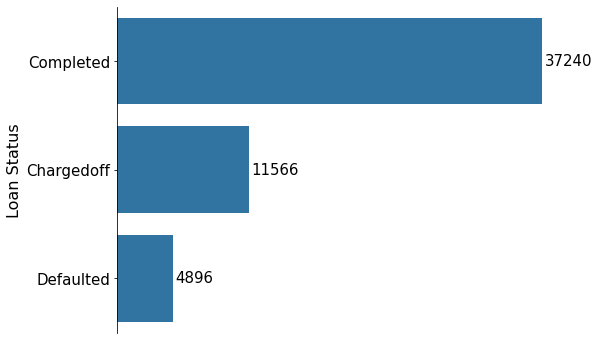

In [149]:
plt.figure(figsize=(8,6))
sb.countplot(data=loan, y='LoanStatus', color=default_color, order=status_order);

# Logic to print the proportion text on the bars
for i in range (status_counts.shape[0]):
    # Remember, status_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = status_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_loan)
    # Print the string value on the bar. 
    plt.text(count+200, i, count, va='center', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Loan Status', fontsize=16)
    plt.xlabel('')
    plt.tick_params(labelbottom=False,bottom=False)
    sb.despine(bottom=True)

> The dataset consists of roughly 37k completed loans, 11500 charged off loans (i.e wriitten off as loss to the lender/investor) and approximately 4900 defaulted loans.

Next up, the first predictor variable of interest: DebtToIncomeRatio

In [150]:
loan.DebtToIncomeRatio.describe()

count    50583.000000
mean         0.247128
std          0.356766
min          0.000000
25%          0.130000
50%          0.200000
75%          0.300000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

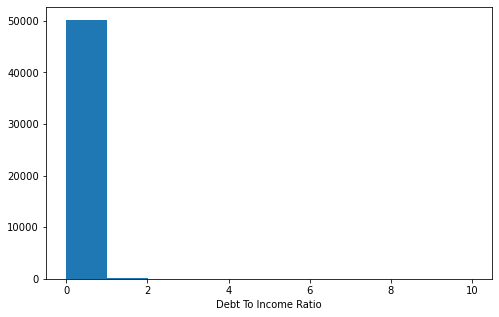

In [151]:
# plotting on a standard scale and default bin size (10)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'DebtToIncomeRatio')
plt.xlabel('Debt To Income Ratio')
plt.show() 


> The above plot is not very descriptive of variable, so i wil try reducing the bin size and plotting on a log scale

In [152]:
loan[loan.DebtToIncomeRatio >= 1].shape[0]/loan.shape[0], loan[loan.DebtToIncomeRatio >= 10].shape[0]

(0.0077836952068824255, 24)

> From the brief statistics above, less than 1% of the entries in dataset have DebtToIncomeRatio value greater than or equal to 1, 99% of the entries have DebtToIncomeRatio values between 0 and 1. Bearing this in mind, I will limit the plot to values between 0 and 1.

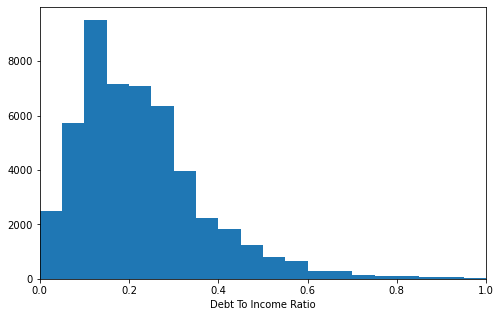

In [153]:
# investigating further on a smaller bin size
binsize = 0.05
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.xlim(0,1)
plt.show()

> Reducing the bin size yielded an insightful plot. The variable's distribution is unimodal and right-skewed.  Majority of the debt-to-income ratio values are below 0.4. Intuitively, how close this value is to zero indicates how healthy the borrower's finances is i.e there is a high chance that the borrower would not default on the loan.

In [154]:
np.log(loan.DebtToIncomeRatio.describe())

count    10.831371
mean     -1.397847
std      -1.030675
min           -inf
25%      -2.040221
50%      -1.609438
75%      -1.203973
max       2.303585
Name: DebtToIncomeRatio, dtype: float64

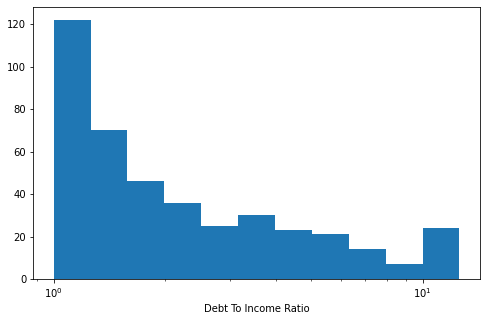

In [155]:
# Investigating on log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loan['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.xscale('log')
plt.show()

> Plotting on a log scale was not really informative in this case as most of the values ended being negative, however, it gave an insight to the distribution of values between 1 and 10.

Moving on to the next variable: IncomeRange</br>This variable is more appropriate as an ordinal (qualitative) variable so i will proceed to convert it accordingly.

In [156]:
income_levels = ['Not displayed','Not employed','$0', '$1-24,999',
                '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
                '$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                            categories = income_levels)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_var)

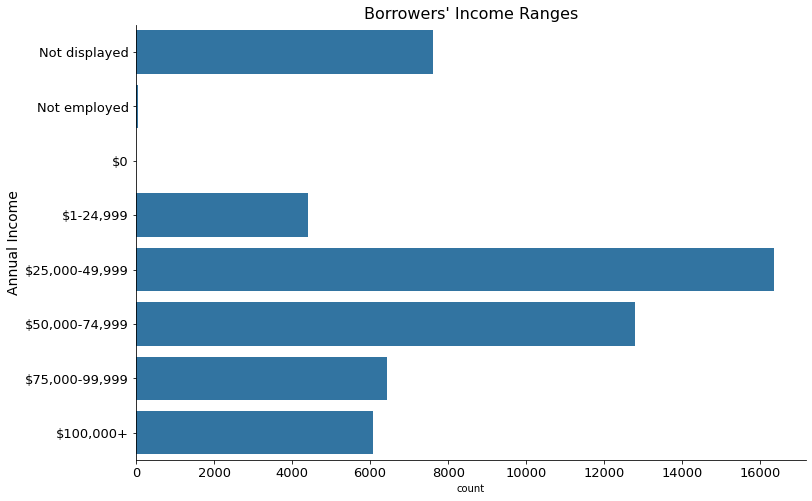

In [157]:
plt.figure(figsize=(12,8))
sb.countplot(data=loan, y='IncomeRange', color=default_color)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Annual Income', fontsize=14)
plt.title("Borrowers' Income Ranges", fontsize=16);

> The plot showed that most of the borrowers earned between $25k - $75k annually while some high earners earned above $75k. Quite a few did not disclosed their earnings and others are unemployed.

Next is StatedMonthlyIncome

In [158]:
loan.StatedMonthlyIncome.describe()

count     53702.000000
mean       5184.801716
std        5725.473919
min          12.500000
25%        2916.666667
50%        4250.000000
75%        6250.000000
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

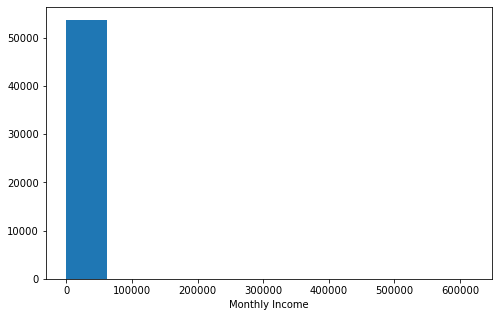

In [159]:
# investigating on standard scale and default bin size
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome')
plt.xlabel('Monthly Income')
plt.show()

> This is not informative, i will try plotting on a log scale.

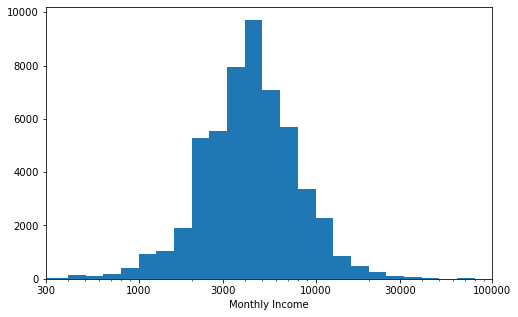

In [160]:
# investigating further on a smaller bin size and log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(loan['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Monthly Income')
plt.xscale('log')
plt.xticks([1e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5], [10, 100, 300, 1000, 3000, 10000, 30000, 100000])
plt.xlim(3e2,1e5)
plt.show()

> The distribution monthly income of borrowers is unimodal and moderately normal on a log scale. Lots of borrowers earn roughly between $2000 and $10000.

BorrowerAPR

In [161]:
loan['BorrowerAPR'].describe()

count    53702.000000
mean         0.221918
std          0.088164
min          0.006530
25%          0.149420
50%          0.214300
75%          0.295100
max          0.512290
Name: BorrowerAPR, dtype: float64

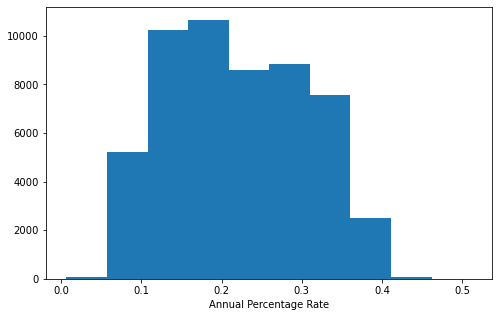

In [162]:
# investigating on standard scale and default bin size
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR')
plt.xlabel('Annual Percentage Rate')
plt.show()

> The above distribution is fairly informative but i will explore the distribution further on a smaller bin size.

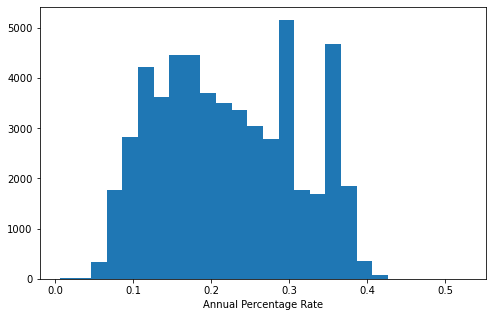

In [163]:
# investigating further on a smaller bin size
binsize = 0.02
bins = np.arange(loan['BorrowerAPR'].min(), loan['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins=bins)
plt.xlabel('Annual Percentage Rate')
plt.show()

> The annual percentage rate (APR) distribution has an unsual shape with majority of the APR is close to 0.2 or lower. There are two spikes on the higher side roughly between 0.3 and 0.38 indicating quite a lot of debt are being serviced within this APR range.

EmploymentStatus

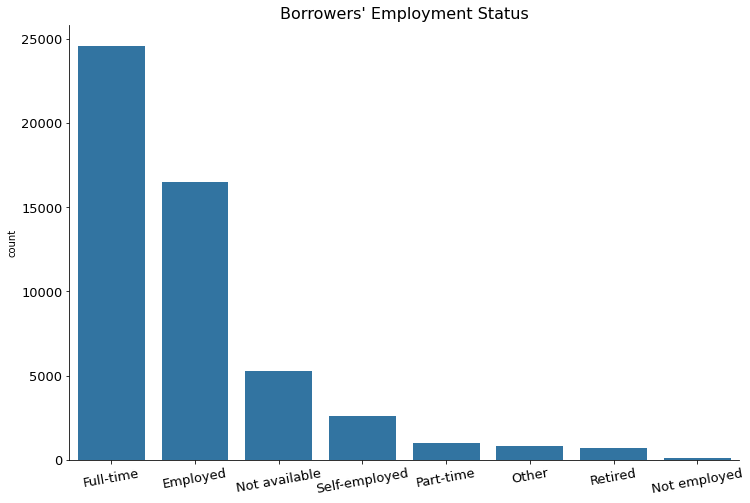

In [164]:
plt.figure(figsize=(12,8))
sb.countplot(data=loan, x='EmploymentStatus', color=default_color,
            order = loan['EmploymentStatus'].value_counts().index)
sb.despine()
plt.xticks(rotation=10, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('')
plt.title("Borrowers' Employment Status", fontsize=16);

> Most of the borrowers are full-time or contract workers (freelancers, entrepreneurs etc.) with only a minute proportion retired or unemployed. Some however did not disclose their employment status.

ProsperScore </br> This should be an ordinal (qualitative) variable, so i will proceed to convert it accordingly before plotting.

In [165]:
pscore_levels = list(np.arange(1,12,1))
ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                            categories = pscore_levels)
loan['ProsperScore'] = loan['ProsperScore'].astype(ordered_var)

In [166]:
loan.ProsperScore.describe()

count     25576
unique       11
top           8
freq       4478
Name: ProsperScore, dtype: int64

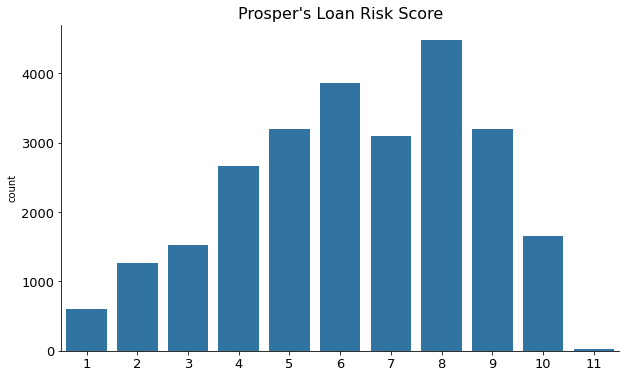

In [167]:
plt.figure(figsize=(10,6))
sb.countplot(data=loan, x='ProsperScore', color=default_color)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('')
plt.title("Prosper's Loan Risk Score", fontsize=16);

> The higher the score, the lesser the risk associated with the loan. Majority of the loans in the dataset have a risk's score of over 5 points which indicates that the risk level of such loans are fairly low.

MonthlyLoanPayment

In [168]:
np.log10(loan.MonthlyLoanPayment.describe())

count    4.729990
mean     2.348661
std      2.265626
min          -inf
25%      1.994625
50%      2.237041
75%      2.477016
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

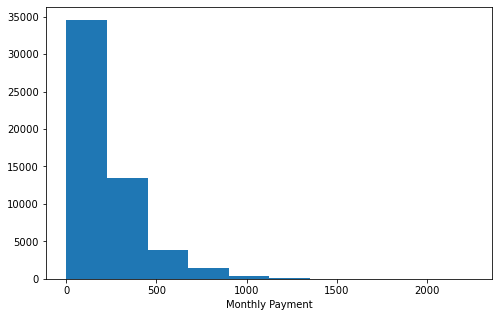

In [169]:
# investigating on standard scale and default bin size

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment')
plt.xlabel('Monthly Payment')
plt.show()

The distribution appears to be right-skewed. I will explore further on a smaller bin size and log scale.

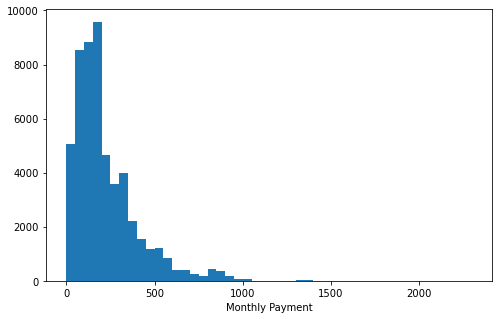

In [170]:
# investigating further on a smaller bin size
binsize = 50
bins = np.arange(loan['MonthlyLoanPayment'].min(), loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Payment')
plt.show()

> Monthly payment has a fairly long-tailed distribution with most of the loan payments on the low end and few on the high side.

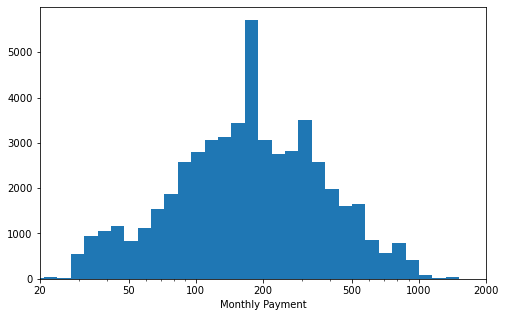

In [171]:
# The variable has a fairly long tail distribution, so i will attempt to put it on a log scale instead
log_binsize = 0.06
bins = 10 ** np.arange(loan['MonthlyLoanPayment'].min(), np.log10(loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins=bins)
plt.xlabel('Monthly Payment')
plt.xscale('log')
plt.xticks([1e1, 2e1, 5e1, 1e2, 2e2, 5e2, 1e3, 2e3], [10, 20, 50, 100, 200, 500, 1000, 2000])
plt.xlim(2e1, 2e3)
plt.show()

> However, plotting the variable on a log-scale yielded a fairly normal and unimodal distribution with most of the values between $30 - $1000 (low end).

ProsperPrincipalOutstanding

In [172]:
loan.ProsperPrincipalOutstanding.describe()

count    10385.000000
mean      2336.236823
std       3288.851196
min          0.000000
25%          0.000000
50%       1106.950000
75%       3379.370000
max      22586.670000
Name: ProsperPrincipalOutstanding, dtype: float64

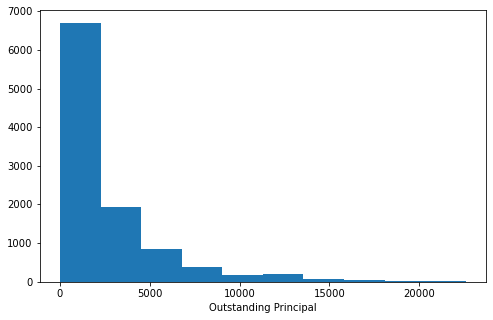

In [173]:
# investigating on standard scale and default bin size

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'ProsperPrincipalOutstanding')
plt.xlabel('Outstanding Principal')
plt.show()

The variable has a long tailed (right-skewed) distribution with majority of the values less than $5000. I will explore further on a log scale

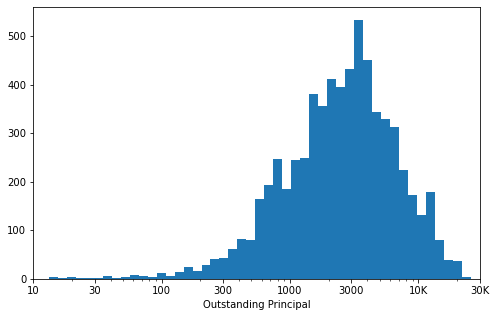

In [174]:
# plotting on log scale and smaller bin size
log_binsize = 0.07
bins = 10 ** np.arange(loan['ProsperPrincipalOutstanding'].min(), np.log10(loan['ProsperPrincipalOutstanding'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'ProsperPrincipalOutstanding', bins=bins)
plt.xlabel('Outstanding Principal')
plt.xscale('log')
plt.xticks([1, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4], [1, 10, 30, 100, 300, 1000, 3000, '10K', '30K'])
plt.xlim(1e1, 3e4)
plt.show()

> The varible appears to be right-skewed on standard scale and default bin size. However, when plotted on a log scale, it shows a long-tailed (left-skewed), unimodal distribution with a peak value at slightly above 3000. It can be inferred that of the borrowers with outstanding payment, most of them owed above 1000 and from the statistical analysis about 25% of borrowers with prior loan listing/record do not have outstanding payment.</br>
N.B Values in this variable for users with no prior loan listing/record were recorded as nulls.

Exploring other variables </br> OnTimeProsperPayments and TotalProsperPaymentsBilled

In [175]:
loan.OnTimeProsperPayments.describe(), loan.TotalProsperPaymentsBilled.describe()

(count    10385.000000
 mean        19.539817
 std         15.490310
 min          0.000000
 25%          9.000000
 50%         14.000000
 75%         27.000000
 max        114.000000
 Name: OnTimeProsperPayments, dtype: float64,
 count    10385.000000
 mean        20.134521
 std         15.894936
 min          0.000000
 25%          9.000000
 50%         15.000000
 75%         29.000000
 max        120.000000
 Name: TotalProsperPaymentsBilled, dtype: float64)

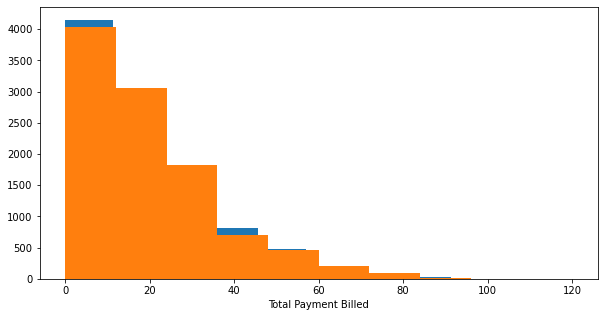

In [176]:
# investigating on standard scale and default bin size
plt.figure(figsize = [10, 5])

# plt.subplot(1,2,1)
plt.hist(data = loan, x = 'OnTimeProsperPayments')
# plt.title('On-Time Payment made prior new listing')
plt.xlabel('Amount of On-Time Payment')

# plt.subplot(1,2,2)
plt.hist(data = loan, x = 'TotalProsperPaymentsBilled')
# plt.title('On-Time Payment made prior new listing')
plt.xlabel('Total Payment Billed')

plt.show()

> After observing that the statistical analysis of the variables are almost the same, exploring them on a single showed that borrowers with prior loans paid off their debts on time at the beginning but as the amount of payment bills increases the amount of timely payment made decreases. This means the longer the duration and payment cycle the higher the chances of delayed payment from the borrowers (some might even default on their loans as the payment period stretches out).

Listing category </br> The values in this column were numerical which are not informative, so i will proceed to map them to what they represent accordingly.

In [177]:
listing_category = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 
        3 :'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 
        7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 
        11 : 'Engagement Ring',12 : 'Green Loans', 13 : 'Household Expenses', 
        14 : 'Large Purchases',15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV',
        18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

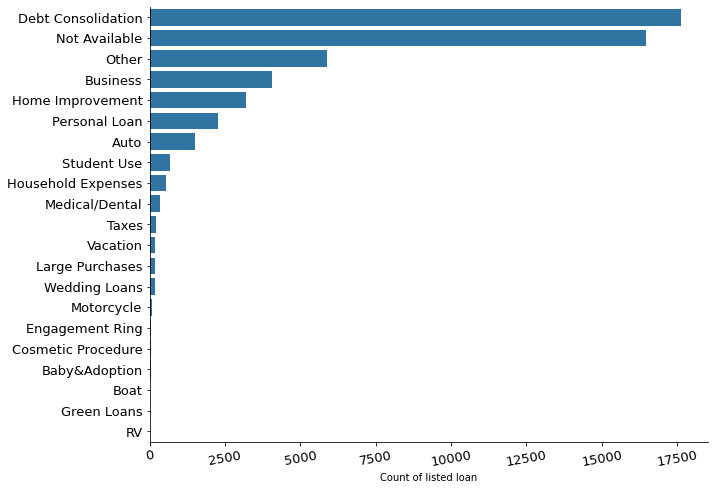

In [178]:
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].map(listing_category)

plt.figure(figsize=(10,8))
sb.countplot(data=loan, y='ListingCategory (numeric)', color=default_color,
            order = loan['ListingCategory (numeric)'].value_counts().index)
sb.despine()
plt.xticks(rotation=10, fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Count of listed loan')
plt.ylabel('')
plt.show()

> Majority of the loans listed are for Debt Consolidation, which means borrowers mostly request for a loan to pay off existing loans.

Term </br> This is more appropriate as an ordinal variable, so i will convert it accordingly

In [179]:
terms = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                            categories = terms)
loan['Term'] = loan['Term'].astype(ordered_var)

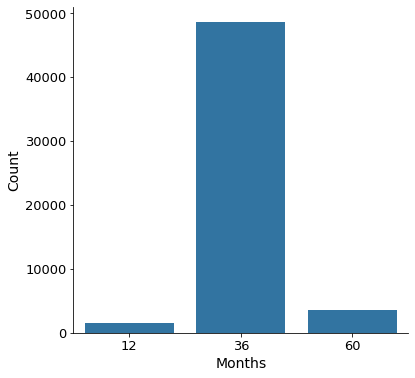

In [180]:
plt.figure(figsize=(6,6))
sb.countplot(data=loan, x='Term', color=default_color)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()



> Majority of the loans are taken out in 36-months repayment window i.e most borrowers go for a 3-years loan term.



ProsperPrincipalBorrowed

In [181]:
loan.ProsperPrincipalBorrowed.describe()

count    10385.000000
mean      7111.578910
std       6394.099013
min          0.000000
25%       3000.000000
50%       5000.000000
75%       9500.000000
max      60001.000000
Name: ProsperPrincipalBorrowed, dtype: float64

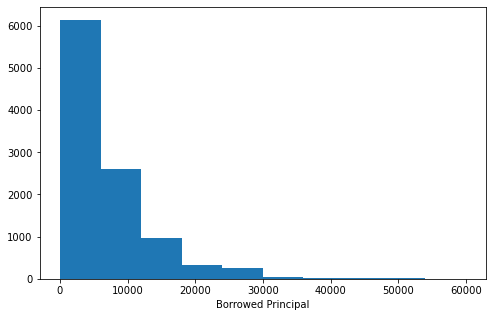

In [182]:
# investigating on standard scale and default bin size

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'ProsperPrincipalBorrowed')
plt.xlabel('Borrowed Principal')
plt.show()

> The variable has a fairly long tailed and right-skewed distribution. I will explore further on a log scale

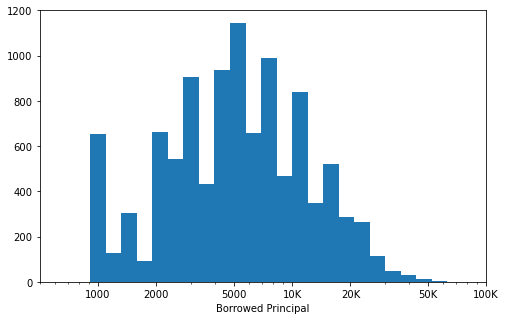

In [183]:
# plotting on log scale
log_binsize = 0.08
bins = 10 ** np.arange(0, np.log10(loan['ProsperPrincipalBorrowed'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'ProsperPrincipalBorrowed', bins=bins)
plt.xlabel('Borrowed Principal')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [1000, 2000, 5000, '10K', '20K', '50K', '100K'])
plt.xlim(500,1e5)
plt.show()

> This variable distibution shows that prior to a new loan listing, borrowers with loan record(s) have borrowed at least $1000, on an average $8400 (with majority of the borrowed principal standing roughly at the median value $6000) and only a small percentage of borrowers have borrowed over $50K.

Occupation

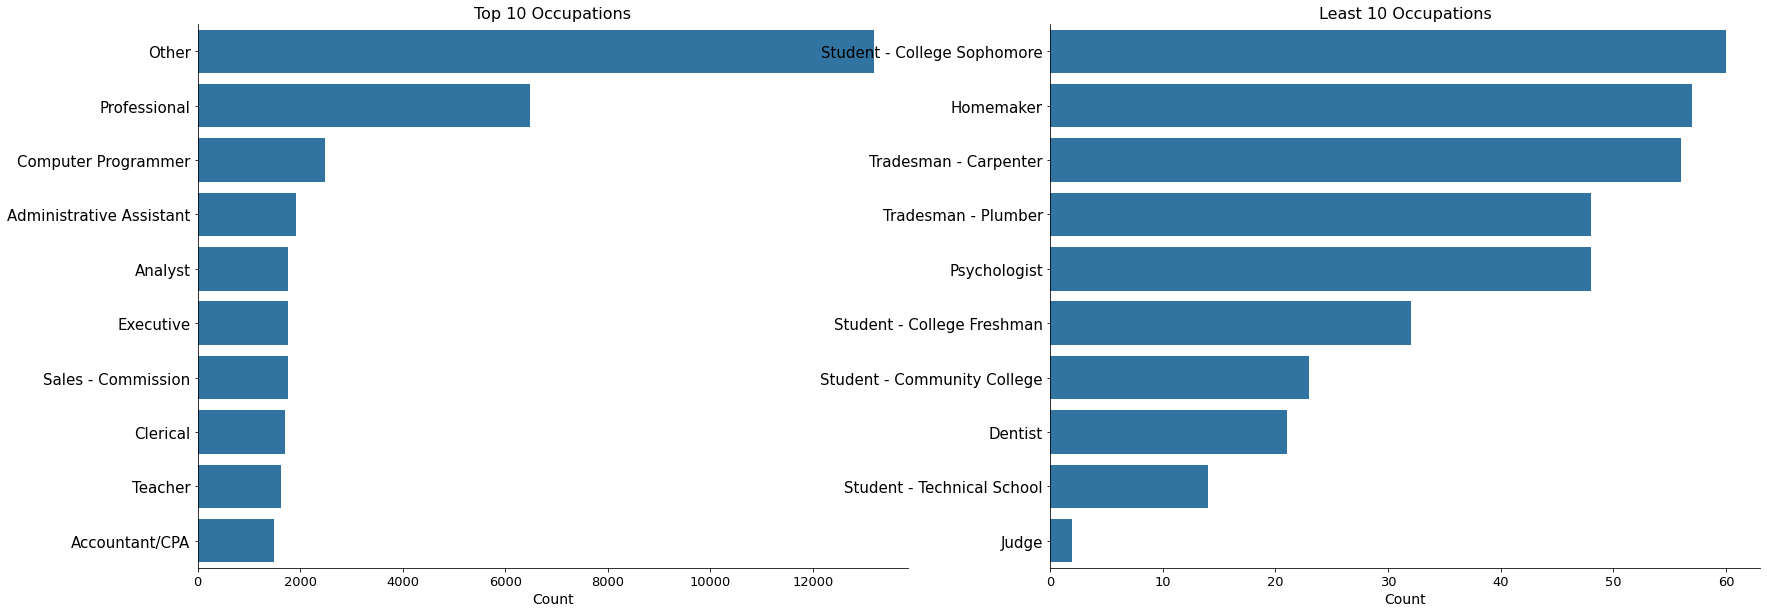

In [184]:
plt.figure(figsize = [28, 10])

plt.subplot(1, 2, 1)
sb.countplot(data=loan, y='Occupation', color=default_color, order = loan['Occupation'].value_counts().head(10).index)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel('Count',fontsize=14)
plt.ylabel('')
plt.title("Top 10 Occupations", fontsize=16)


plt.subplot(1, 2, 2)
sb.countplot(data=loan, y='Occupation', color=default_color, order = loan['Occupation'].value_counts().tail(10).index)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel('Count',fontsize=14)
plt.ylabel('')
plt.title("Least 10 Occupations", fontsize=16)

plt.show()


> Majoriy of the borrowers' are professional (full time workers, entrepreneurs etc.) with students (college, sophomore and technical) occupying a small percentage.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan variable is a qualitative data. From the visual, it can be inferred that the dataset consists of roughly 37k completed loans, 11500 charged off loans (i.e wriitten off as loss to the lender/investor) and 4900 defaulted loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Prior to visualizatiom, I found that 25 values were missing in the 'BorrowerAPR' column which is rather odd as "APR = BorrowerRate + other charges". This would only be valid if there were missing values in the corresponding rows under "InterestRate" column as well. So i replaced the missing values with the "BorrowerRate" multiplied by 1.03 (I assumed 3% to account for the other charges fee).</br>

> Exploring some numerical variables such 'DebtToIncomeRatio' with small bin size rather than the default bin size on a histogram plot resulted in a much better distribution visual.
I reassigned some variables such as "IncomeRange" to the appropriate ordinal (categorical) data type before plotting visuals.</br>

> It was quite odd that some stated monthly income were less than zero so i concluded they were low value outliers and excluded them from my visual. I also had to plot this varibale on a log scale as it took on a large range of values.

## Bivariate Exploration

In [185]:
numeric_vars = ['DebtToIncomeRatio','StatedMonthlyIncome', 'MonthlyLoanPayment', 'ProsperPrincipalOutstanding','BorrowerAPR']
                 
categoric_vars = ['LoanStatus','IncomeRange','EmploymentStatus','ProsperScore']

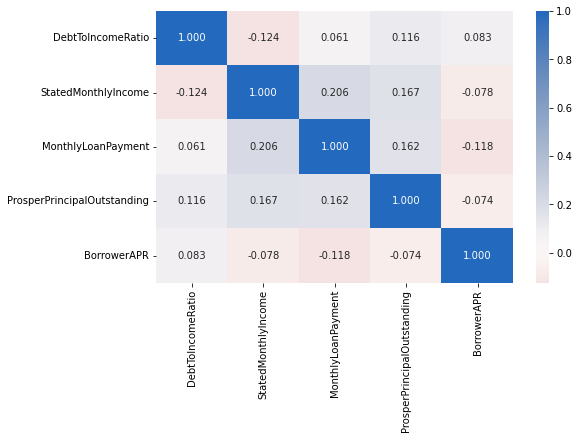

In [186]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

I will explore these correlations further on a PairGrid plot.

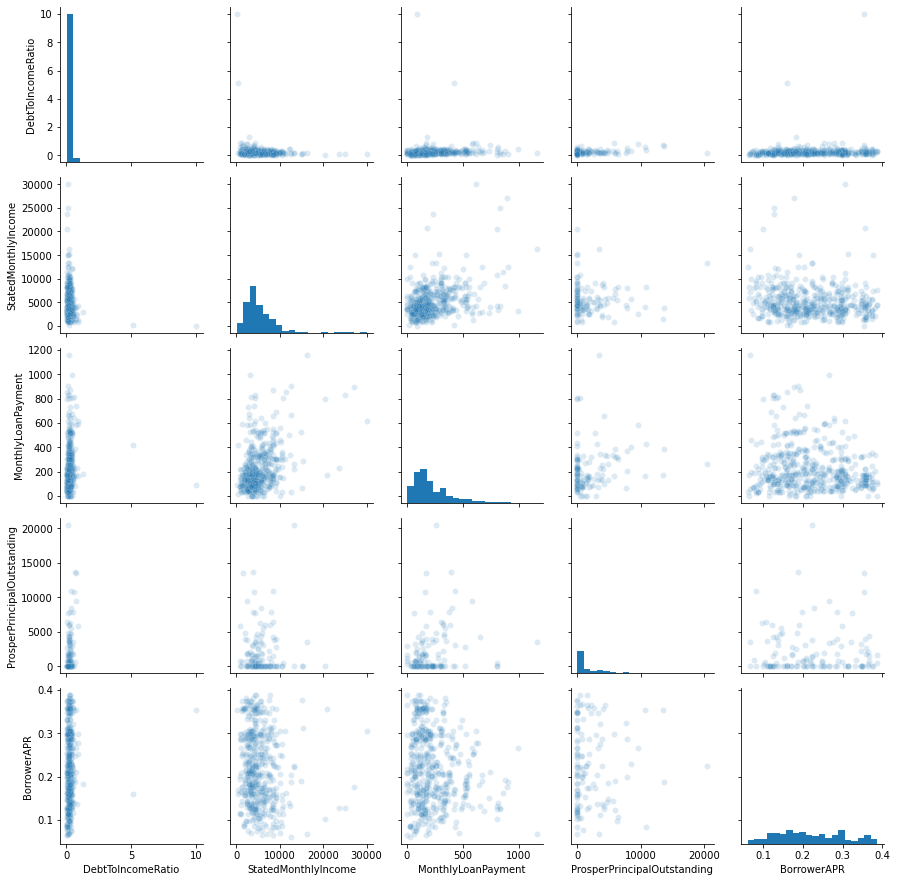

In [187]:
np.random.seed(3)

samples = np.random.choice(loan.shape[0], 500, replace = False)
loan_samp = loan.reset_index().loc[samples.tolist(),:]

g = sb.PairGrid(data = loan_samp.sample(500), vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(sb.scatterplot, alpha=0.15, x_jitter = 0.3, y_jitter=0.3);

> As i suspected, "DebtToIncomeRatio" and "statedMonthlyIncome" have fairly negative correlation. 'ProsperPrincipalOutstanding' and 'ProsperPrincipalBorrowed' are also moderately correlated (positive correlation). 

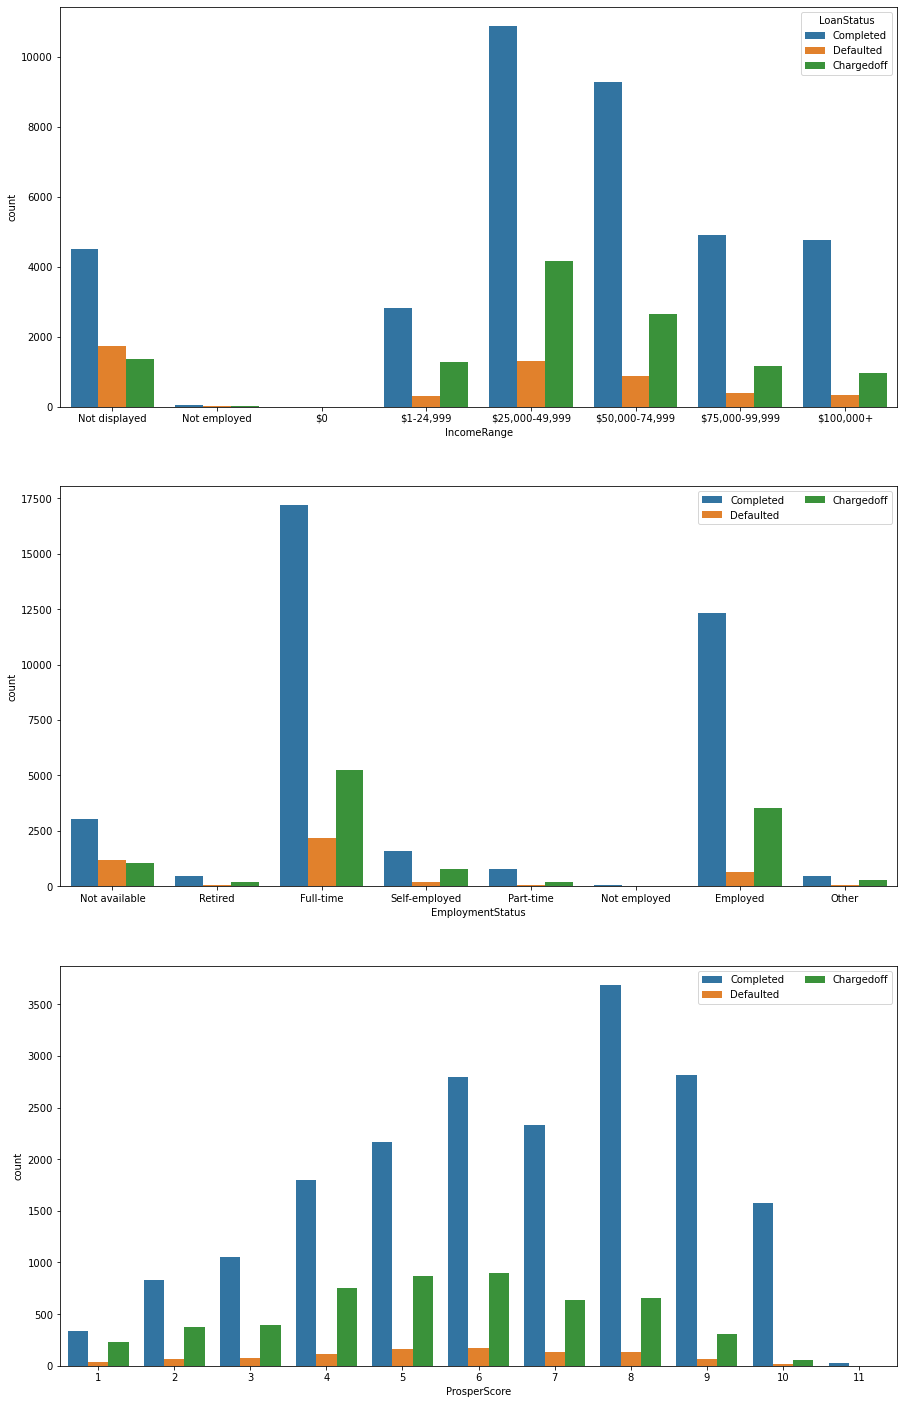

In [188]:
plt.figure(figsize = [15, 25])

# subplot 1: loanStatus vs IncomeRange
plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'IncomeRange', hue = 'LoanStatus')

# subplot 2: LoanStatus vs. EmploymentStatus, use different color palette
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'LoanStatus')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: LoanStatus vs. ProsperScore, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'ProsperScore', hue = 'LoanStatus')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()


> From the visuals, I observed that borrowers on high income range tend to complete more of their loans compared to those on low income range, however, this might be due to the fact a high percentage of borrowers are in the range of $25k - $50k and above but the risk of a loan being defaulted or charged off are low if the borrowers is on the high income range. Most loans are listed under "DebtConsolidated" and for 30months term. Majority of the borrowers are employed and loans on high prosper score has higher potential of being completed.

In [189]:
def bivariateplot(dataframe, x, y, color, linestyle, dodge):
    """ The function plots the distribution of the numerical variable using a boxenplot and shows its central tendency (mean) using a pointplot across the three loan status outcomes"""
    plt.figure(figsize=(18,6))

    plt.subplot(1,2,1) # boxenplot
    sb.boxenplot(data = dataframe, x = x, y = y)

    plt.subplot(1,2,2) # pointplot
    sb.pointplot(data = dataframe, x = x, y = y, palette = color, linestyles = linestyle, dodge = dodge)

    plt.show()

LoanStatus Vs. DebtToIncomeRatio

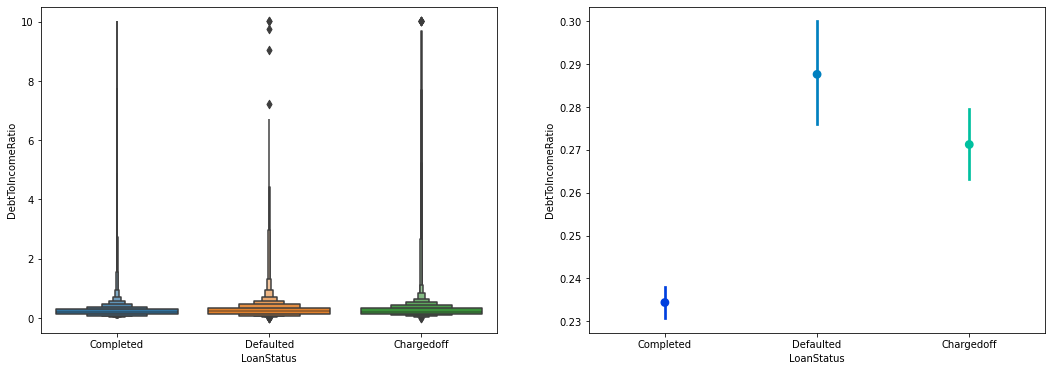

In [190]:
bivariateplot(loan, 'LoanStatus', numeric_vars[0], 'winter', '', 0.1)

> It can be observed from the boxenplot on the left that most data points across each loan status falls within the low Debt-to-Income ratio values. The pointplot on the right shows that defaulted and chargedoff loans have high Debt-to-Income ratio values on an average compare to completed loans.

LoanStatus Vs. StatedMonthlyIncome 

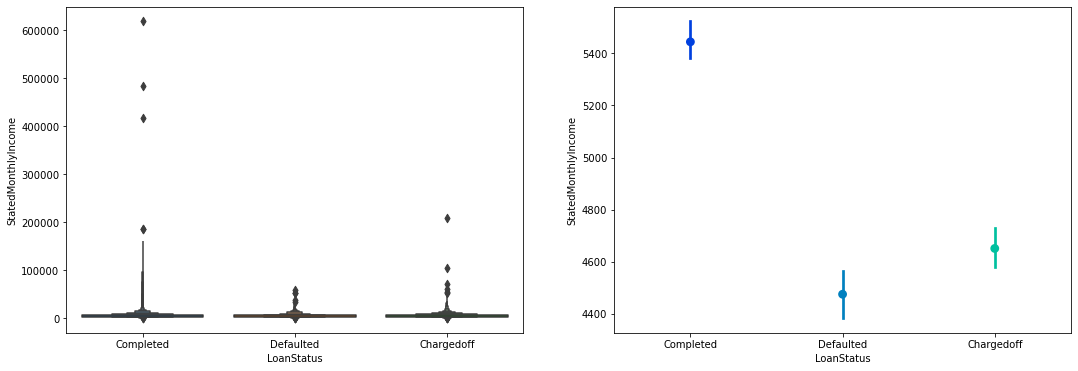

In [191]:
bivariateplot(loan, 'LoanStatus', numeric_vars[1], 'winter', '', 0.1)


> It can be observed from the boxenplot on the left that most data points across each loan status falls within $0 to about $5000 monthly income with some outliers. The pointplot on the right shows that for defaulted and chargedoff loans, borrowers earns pretty low on an average compared to borrowers that completed their loans. The conclusion is however plagued by outliers which are quite more on the completed loan status.

LoanStatus Vs. MonthlyLoanPayment

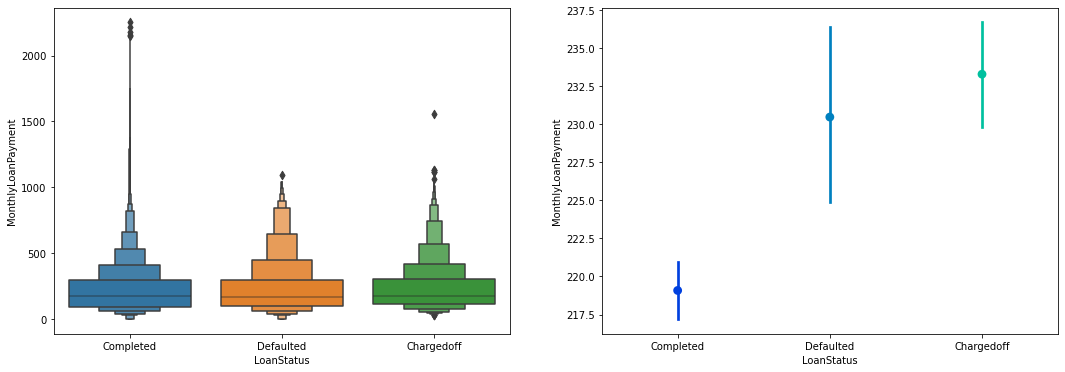

In [192]:
bivariateplot(loan, 'LoanStatus', numeric_vars[2], 'winter', '', 0.1)


> It can be observed from the boxenplot on the left that most data points across each loan status falls within $0 to about $1000 monthly loan payment with some outliers. The pointplot on the right shows that for defaulted and chargedoff loans, borrowers pay fairly high on an average monthly compared to borrowers that completed their loans.

LoanStatus Vs. ProsperPrincipalOutstanding

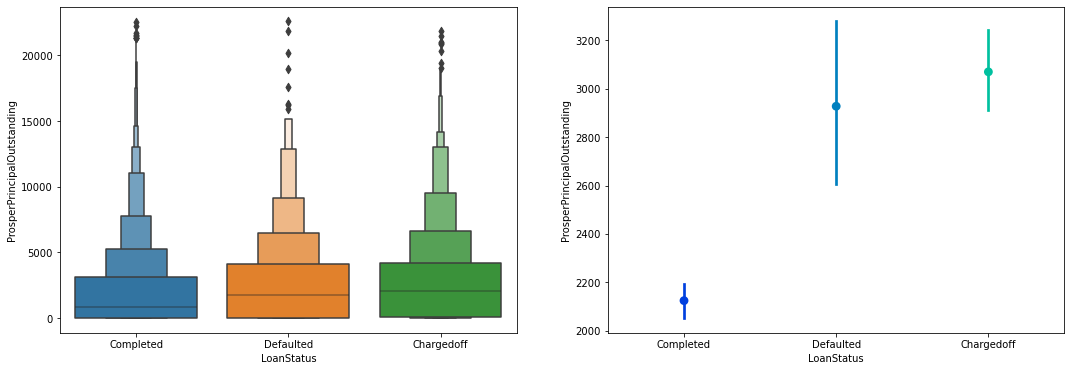

In [193]:
bivariateplot(loan, 'LoanStatus', numeric_vars[3], 'winter', '', 0.1)


> It can be observed from the boxenplot on the left that most data points across each loan status falls within $0 to about $15000 outstanding payment with presence of some outliers. The pointplot on the right shows that for defaulted and chargedoff loans, borrowers owed pretty hight amount on an average compared to borrowers that completed their loans.

LoanStatus Vs. BorrowerAPR

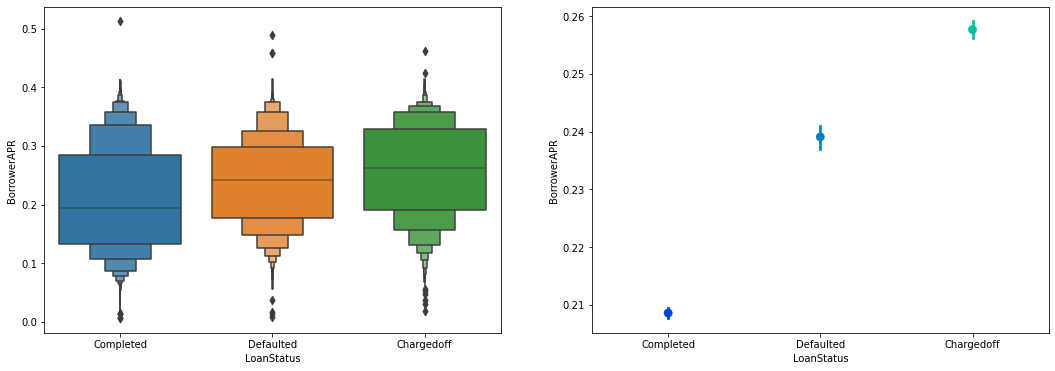

In [194]:
bivariateplot(loan, 'LoanStatus', numeric_vars[4], 'winter', '', 0.1)


> It can be observed from the boxenplot on the left that most data points across each loan status falls within close to 0 and about 0.4 monthly income with presence of some some outliers. The pointplot on the right shows that for defaulted and chargedoff loans, the APR values are pretty high on an average compared to borrowers that completed their loans.

> N.B I picked boxenplot over boxplot because of the size of the dataset as boxenplot are usually yields more descriptive information on large dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Investigating the relationships between the target variable "loanStatus" and some numerical values of interest using boxenplot yielded interesting (suspected) insights. The "BorrowerAPR" showed a significant effect on the loan's status (completed/defaulted/charged off).</br> 

Completed loans have an average APR of 0.2 and 50% of the APR values are below 0.19, defaulted loans have an average APR of 0.23 and 50% of the APR values are below 0.24 while charged off loans had an average APR of 0.25 and 50% of the APR values are below 0.26. This indicates that loans on low APR have a higher chance of being completed. Interesting "ProsperPrincipalOutstanding" and "MonthlyLoanPayment" variables showed similar pattern. even though the variables are negatively correlated with one and other and with "BorrowerAPR". However, the reverse was the case for "StatedMonthlyIncome" though i observed that this might be due to outliers in each loan's status category under the variables.</br>

I discovered that the higher the "DebtToIncomeRatio", the higher the chances that a borrower would default on a loan. "DebtToIncomeRatio" (DTI) is a measure of how healthy a person financial portfolio is, a high DTI indicates that the person spends much of the income on debts while a low DTI indicates that a person spends less of the income on debts. From analyzing the plot, borrowers with low DTI tends to complete theri loans more than those with high DTI. Also it was no surprise than loans with higher prosperscore had a high percentage of completion with decreasing risk of default or charged off. If I was to invest (be a lender), i would look out for these numbers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It was pretty odd that "ProsperPrincipalOutstanding" and "MonthlyLoanPayment" have a very weak negative correlation with "BorrowerAPR", i expected a fairly strong positive or weak positive correlation at the very least. Also, it was interesting to find that the higher the income of a borrower, the lower the DTI ratio though the correlation was quite weak, -0.124.


## Multivariate Exploration

Create faceted scatterplots for two numerical variables and the target variable "LoanStatus"

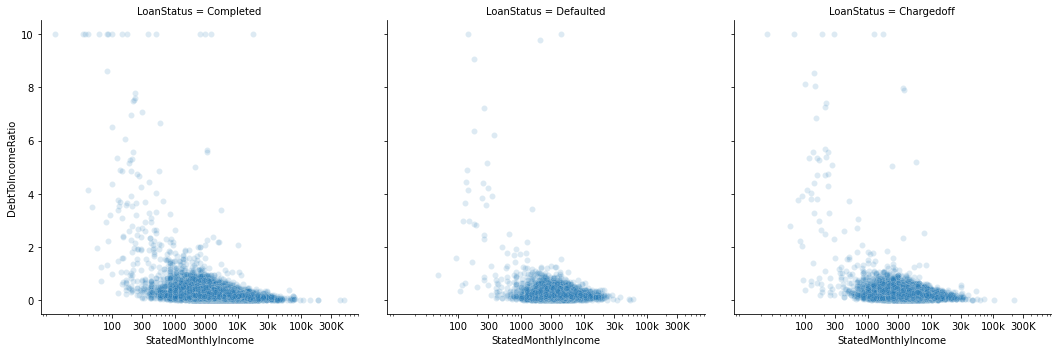

In [195]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5,)
g.map(sb.scatterplot,'StatedMonthlyIncome', 'DebtToIncomeRatio', alpha = 0.15, x_jitter = 0.3, y_jitter=0.3)
plt.xscale('log')
plt.xticks([1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5], [100, 300, 1000, 3000, '10K', '30k', '100k', '300K'])
plt.show()

> The varibles somewhat have inverse relationship and showed similar pattern across the different loan status outcomes. Also there is ceiling a Debt-to-Income ratio values which was stated in the dataset documentation.

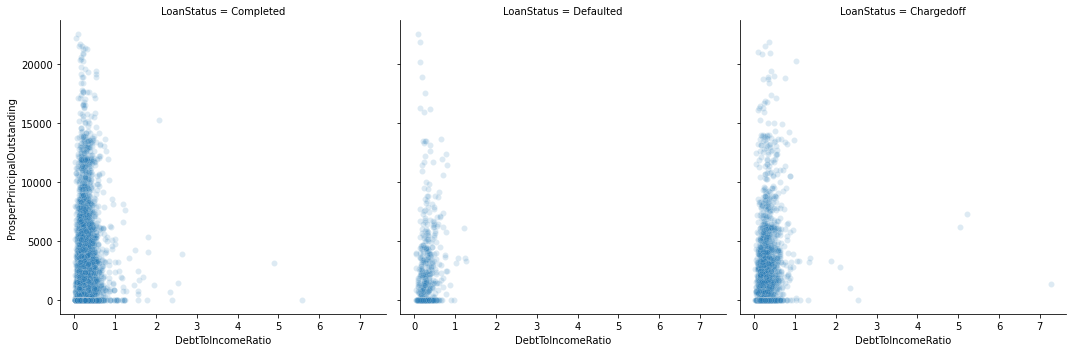

In [196]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5)
g.map(sb.scatterplot, 'DebtToIncomeRatio', 'ProsperPrincipalOutstanding', alpha = 0.15, x_jitter = 0.2, y_jitter=0.3)
plt.show()

> Inconclusive relationship, definitely requires futher exploration

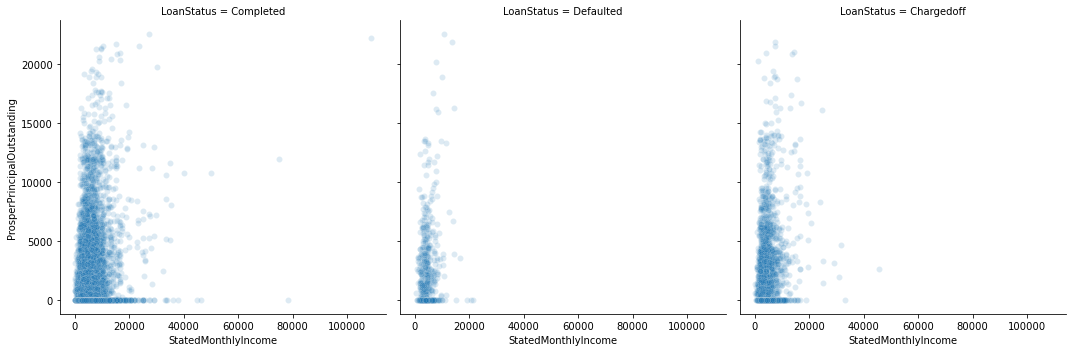

In [197]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5)
g.map(sb.scatterplot, 'StatedMonthlyIncome', 'ProsperPrincipalOutstanding', alpha = 0.15, x_jitter = 0.2, y_jitter=0.3)
plt.show()

> Inconclusive relationship, definitely requires futher exploration

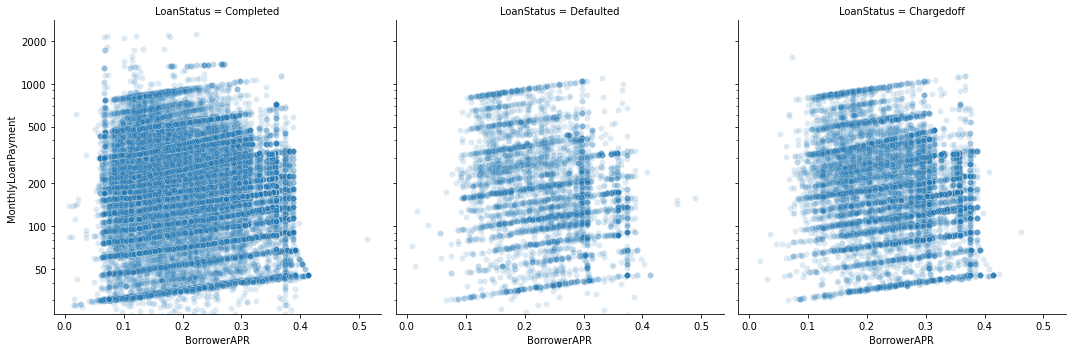

In [198]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5)
g.map(sb.scatterplot, 'BorrowerAPR', 'MonthlyLoanPayment', alpha = 0.15, x_jitter = 0.2, y_jitter=0.3)
plt.yscale('log')
plt.yticks([5e1, 1e2, 2e2, 5e2, 1e3, 2e3], [50, 100, 200, 500, 1000, 2000])
plt.show()

> There appears to be a somewhat linear relationship between the variable across the loan status outcomes.

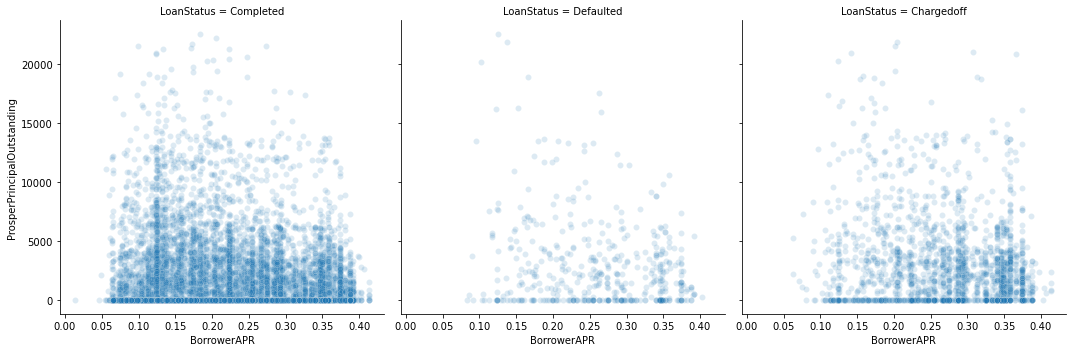

In [199]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5)
g.map(sb.scatterplot, 'BorrowerAPR', 'ProsperPrincipalOutstanding', alpha = 0.15, x_jitter = 0.2, y_jitter=0.3)

plt.show()

> Inconclusive relationship, definitely requires futher exploration

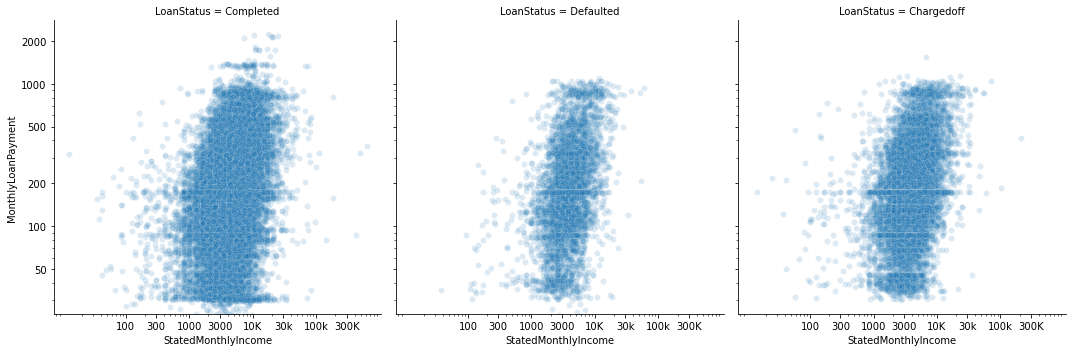

In [200]:
g = sb.FacetGrid(data = loan, col = 'LoanStatus', col_wrap = 3, size = 5)
g.map(sb.scatterplot, 'StatedMonthlyIncome', 'MonthlyLoanPayment', alpha = 0.15)
plt.xscale('log')
plt.yscale('log')
plt.xticks([1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5], [100, 300, 1000, 3000, '10K', '30k', '100k', '300K'])
plt.yticks([5e1, 1e2, 2e2, 5e2, 1e3, 2e3], [50, 100, 200, 500, 1000, 2000])

plt.show()

> The variables have a failrly linear relationship across the loan status outcomes. Though the amount of monthly payment is dependent on APR, this would suggest that high earners take out more expensive loans.

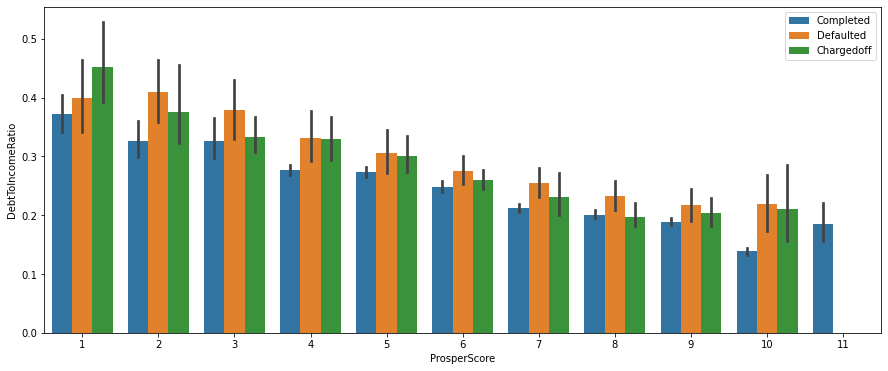

In [201]:
plt.figure(figsize=(15,6))
sb.barplot(data=loan, x="ProsperScore", y='DebtToIncomeRatio', hue="LoanStatus")
plt.legend(loc = 1)
plt.show()

> One observation that stood out here is that loans with high prosper score have low Debt-to-Income ratio.

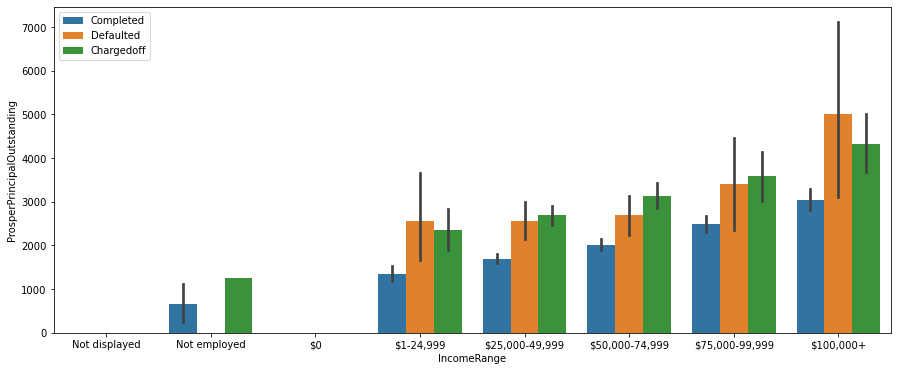

In [202]:
plt.figure(figsize=(15,6))
sb.barplot(data=loan, x="IncomeRange", y='ProsperPrincipalOutstanding',hue="LoanStatus")
plt.legend(loc = 2)
plt.show()

> The plot above suggests that loans are chargedoff or defaulted due to high outstanding payment.

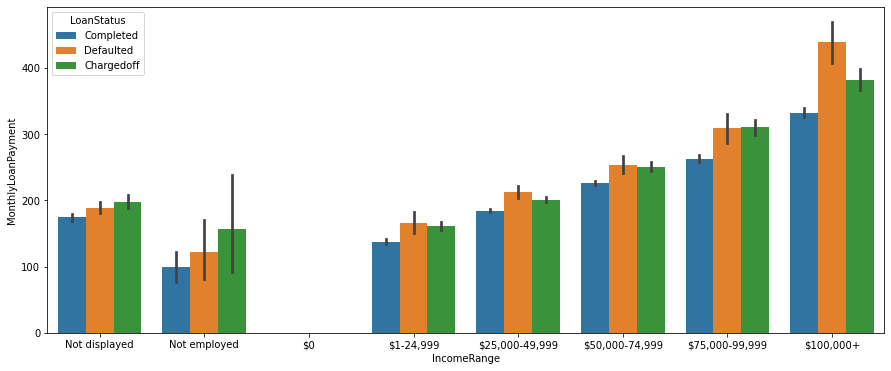

In [203]:
plt.figure(figsize=(15,6))
sb.barplot(data=loan, x="IncomeRange", y='MonthlyLoanPayment',hue="LoanStatus")
plt.show()

> The plot suggest that most loans are chargedoff or defaulted due to high monthly payment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Exploring couple of "two categorical and one numerical variables" gave some interesting insights. The higher the amount a borrower has to pay, the higher the potential that the loan would be defaulted or charged off even if the borrower is on high income range. This also applies if the borrower has some outstanding payment.

### Were there any interesting or surprising interactions between features?

> Loans with high score on average have low DebtToIncomeRatio and I reckon this is a parameter used in estimating "ProsperScore".

## Conclusions
* Bivariate and Multi-variate analysis provided answers to the few questions i had in mind as well as reinforced some hypothesis. Loans APR plays a huge factor in determining if a loan will turn out profitable or not to an investor. I suspected this and exploring the data confirmed it as 50% of the completed loans had 0.2 APR, 50% of defaulted loans had about 0.24 APR and 50% of the charged off loans had roughly 0.26 APR.

* Debt-To-Income ratio (DTI) also plays a significant role as DTI is measure of how healthy a person financial portfolio is. A high DTI indicates that the person spends much of the income on debts while a low DTI indicates that a person spends less of the income on debts. From the analysis, in the majority of the completed loan, borrowers had low DTI.

* I also found that majority of the completed loans had high prosper score and the risk of a loan being charged off or defaulted decreases with increasing prosper score.

* It was also interesting to find that majority of loans listed were in the "DebtConsolidation" category which implies most loans are taken out to service pre existing loans.

* Futher analysis also showed that on average, higher the monthly loan payment the higher the chances that the loan would be defaulted or charged.
